## Purpose

This notebook is to test whether the `neuro_op` module's nodes can successfully infer `world_dist` if only this distribution's information pieces $x_{world}$ are received (i.e., with rates h>0, r=0).

For this, the model is run with nodes receiving different amount of information (i.e., different `t_max`, `h`). Then, each node's posterior predictive distribution (*PPD*), equalling its forecast of future incoming information, is obtained via 
1. sampling of model parameters $\theta$ proportional to its posterior $p(\theta | x_{world})$;
2. using these sampled model parameters to generate data proportional to the model likelihood $p(x_{PPD}|\theta_{sampled})$

PPDs thereby fully conserves uncertainty by paying respect to both posterior and likelihood stochasticity.

We then use the PPDs to quantify the nodes' modelling accuracy by computing the Kullback-Leibler divergence and average MLE distances between node PPDs and data generated by `world_dist`.

In [71]:
import matplotlib.pyplot as plt  # because Figures >> Text
import numpy as np  # ...of course we need numpy
import palettable as pt  # nicer color pallettes
import pickle  # output export/import

In [72]:
cmap = pt.scientific.sequential.Tokyo_4_r.get_mpl_colormap()

#### Figure 1

What:
Changes in computation times.

Varying parameters:
- $t_{max} = 1eX, X\in\{2,3,4,5,6,7^?\}$
- $N_{agents} = 1eX, X\in\{1,2,3,4,5\}$

Bonus points:
- plot expected number of events $N_{events} \approx (r+h)\cdot N_{nodes}\cdot t_{max}$ for comparison
    - deviations would be due to non-event-related stuffs, e.g. sampling (which will take a toll at some $N_{nodes}$)


In [73]:
# give to-be-analysed data
## I know this is rudimental, but hey, it works for me, for now.

data_dir = "../tests/data/2024-02--Run1/"

# 0.) 2D plot data
n_log = np.arange(1, 4.5, 0.5)
t_log = np.arange(1, 5, 1)
n_arr = [int(10**N) for N in n_log]
t_arr = [int(10**t) for t in t_log]

res_NT = []
res_T = []
res_N = []
for N in n_arr:
    for t in t_arr:
        filename = "out--N_nodes-" + str(N) + "--t_max-" + str(t) + ".pkl"
        res_NT.append(filename)
        if N == 100:
            res_T.append(filename)
        if t == 10000:
            res_N.append(filename)

# 1.) t_max, t_exec (N=100)
for t in [int(10**t) for t in [5, 5.5, 6]]:
    res_T.append("out--t_max-" + str(t) + ".pkl")

# 2.) N_nodes, t_exec (t_max = 10000)
for N in [int(10**N) for N in [4.5]]:
    res_N.append("out--N_nodes-" + str(N) + ".pkl")

In [83]:
# Import pickle data from paramter scan runs:

# Extract 't_exec' for {N_nodes, t_max} adaptions for 3d plot
exec_times_NT = []
exec_times_T = []
exec_times_N = []

for file in res_NT:
    with open(data_dir + file, "rb") as export:
        output = pickle.load(export)
        exec_times_NT.append(output["t_exec"])
exec_times_NT = np.array(exec_times).reshape(7, 4)

for file in res_T:
    with open(data_dir + file, "rb") as export:
        output = pickle.load(export)
        exec_times_T.append(output["t_exec"])

for file in res_N:
    with open(data_dir + file, "rb") as export:
        output = pickle.load(export)
        exec_times_N.append(output["t_exec"])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


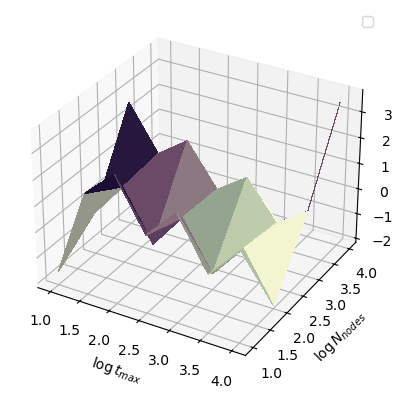

In [85]:
# Plot data
x_NT = n_log
y_NT = t_log

x_NT, y_NT = np.meshgrid(x_NT, y_NT)
z_NT = np.log10(exec_times_NT).T
z_NT_2 = exec_times_NT.T

x_T = [1, 2, 3, 4, 5, 5.5, 6]
y_T = exec_times_T

x_N = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
y_T = exec_times_N


# Create surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

surf = ax.plot_surface(x_NT, y_NT, z_NT, cmap=cmap, linewidth=0, antialiased=False)
# fig.colorbar(surf, shrink=0.5, aspect=5, label="hi")

# Legend, cosmetics...
ax.legend()
ax.set_xlabel("$\log t_{max}$")
ax.set_ylabel("$\log N_{nodes}$")
ax.set_zlabel("$\log t_{exec}")
# ax.view_init(elev=20., azim=-35, roll=0)    # Customize viewing angle

# plt.title("$\log t_{exec}$")

plt.show()

##########
# ToDo check whether you have mixe up x, y axis
##########